<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** Does the customer have a credit card or not?
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_columns", None)

In [204]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [316]:
churn_modelling = pd.read_csv("Churn_Modelling.csv")

In [318]:
df = churn_modelling.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [207]:
df.shape

(10000, 14)

In [208]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [209]:
df.duplicated().sum()

0

In [210]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


<AxesSubplot:xlabel='Balance'>

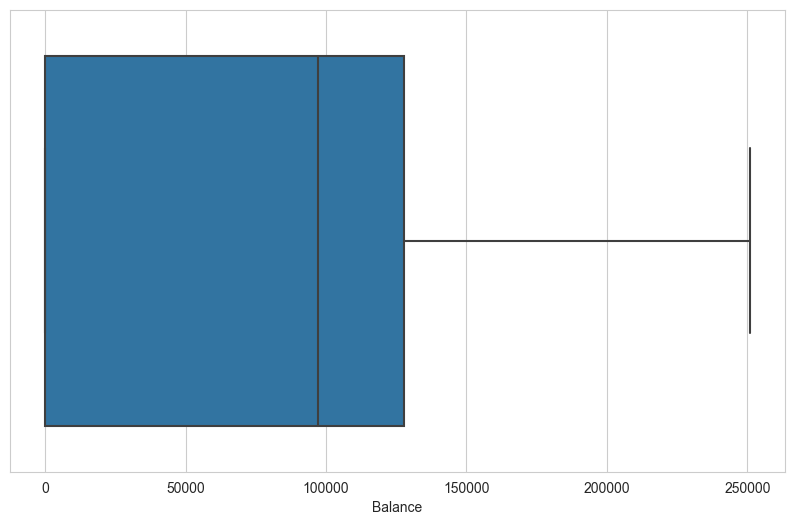

In [211]:
sns.boxplot(df["Balance"])

In [212]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [396]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

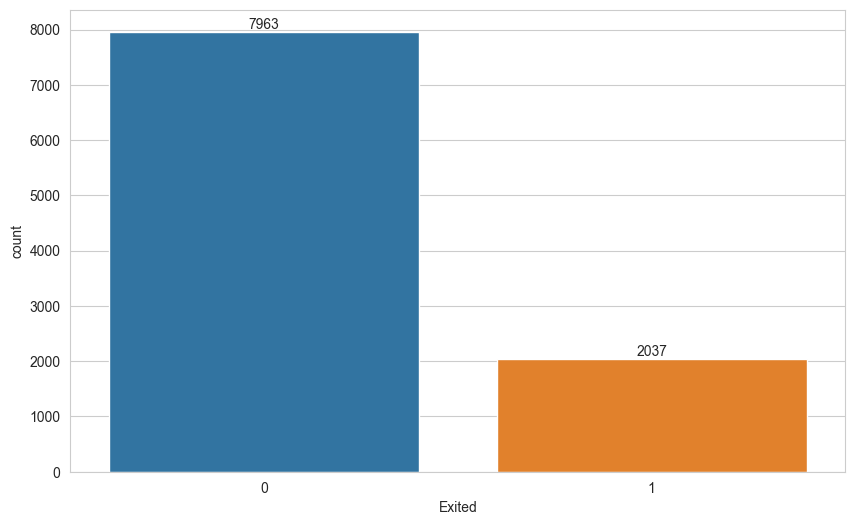

In [214]:
ax = sns.countplot(df["Exited"])
for i in ax.containers:
    ax.bar_label(i)
# Imbalance durum var gözüküyor ancak model performansı sonrası kesin kararı vereceğiz.

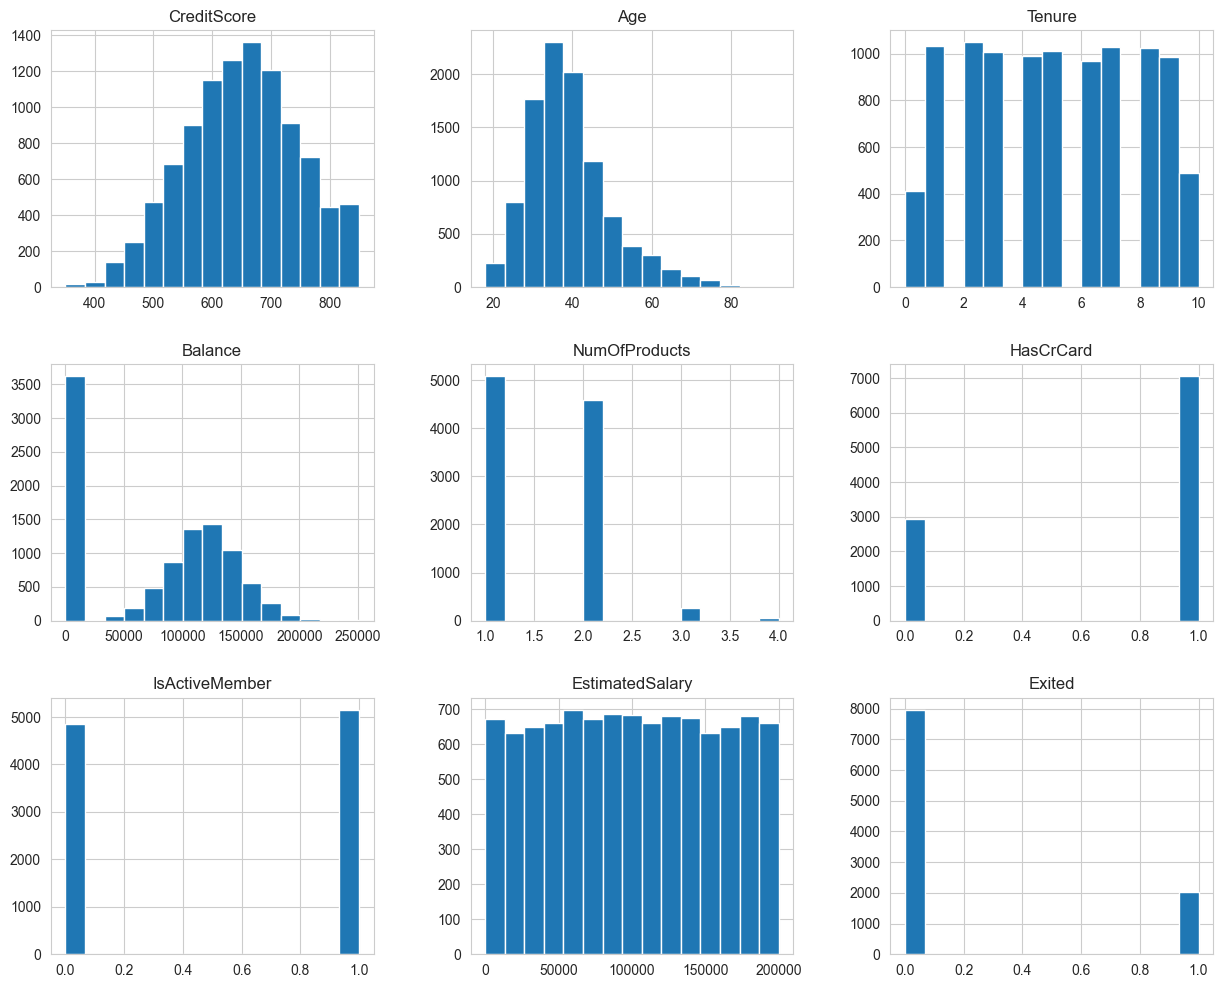

In [215]:
df.hist(figsize=(15,12), bins=15);

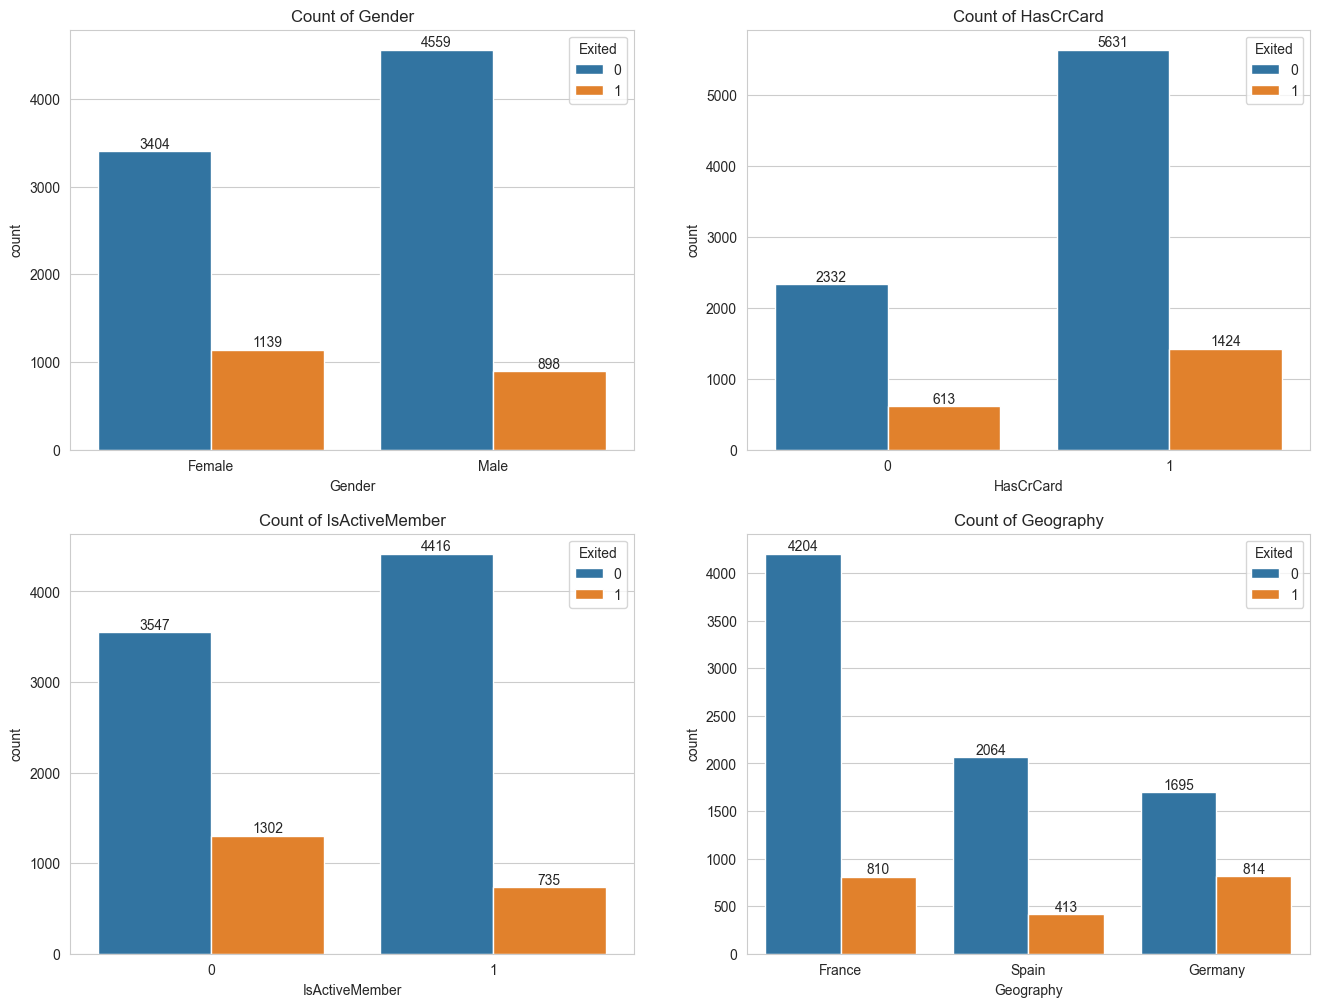

In [216]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax = sns.countplot(data = df, x = i, hue = "Exited")
    for k in ax.containers:
        ax.bar_label(k)
    plt.title(f"Count of {i}")

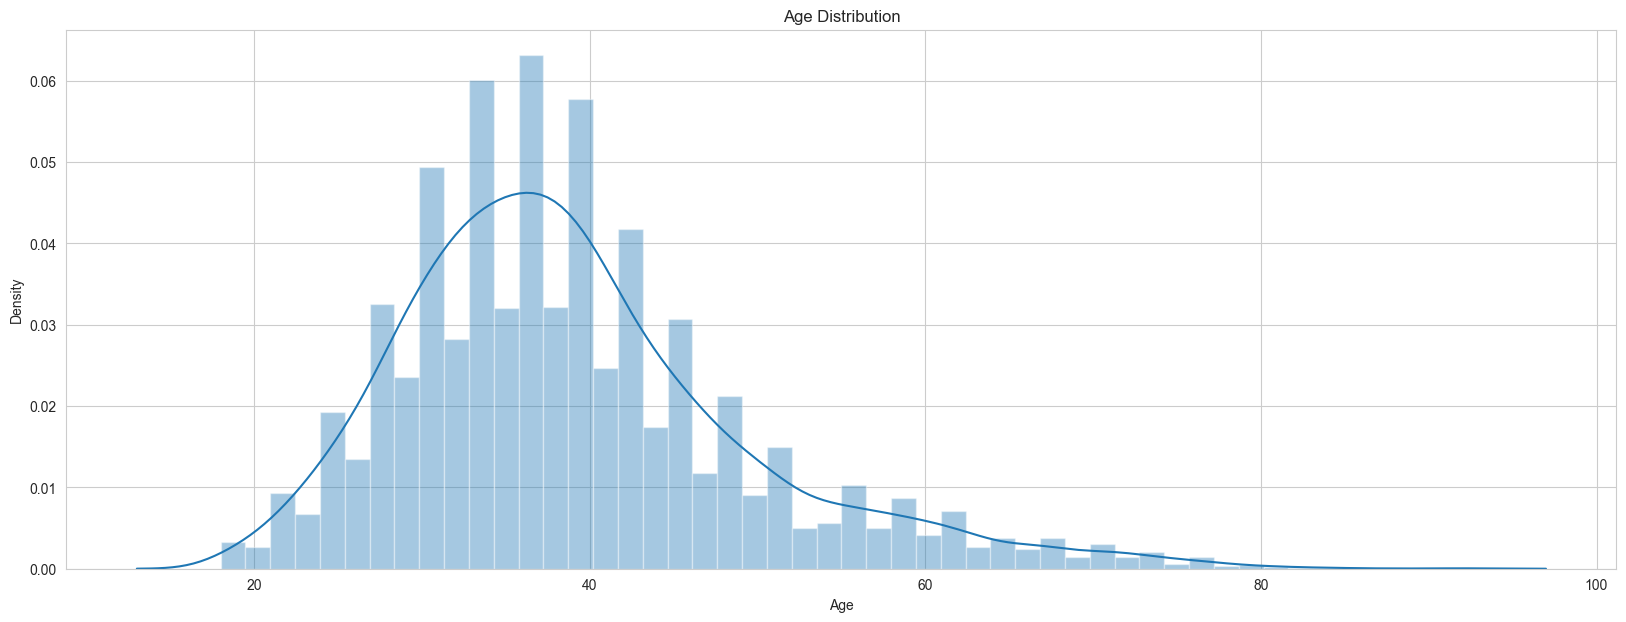

In [217]:
plt.figure(figsize=(20, 7))
sns.distplot(df["Age"])
plt.title("Age Distribution");

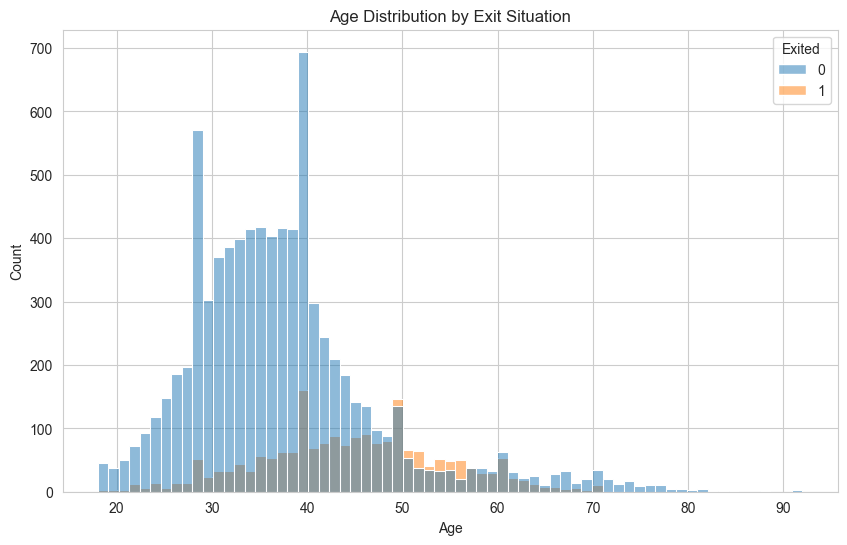

In [218]:
sns.histplot(data = df, x = "Age", hue = "Exited")
plt.title("Age Distribution by Exit Situation");

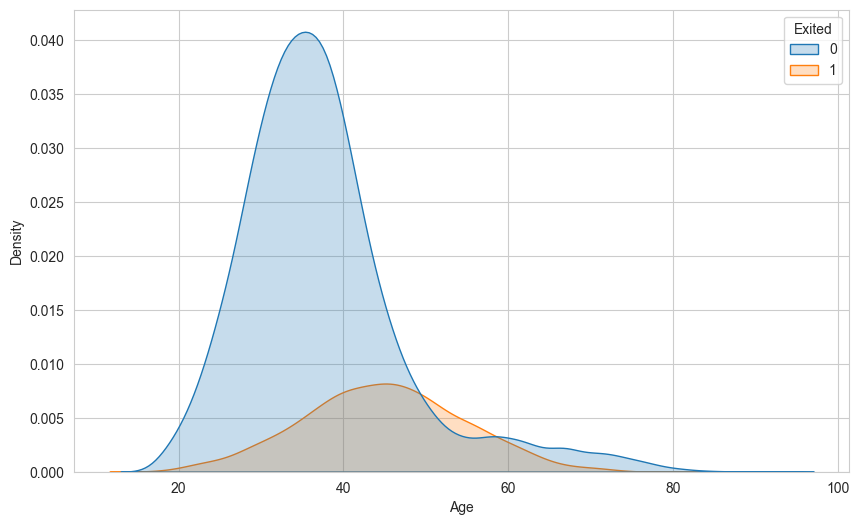

In [219]:
sns.kdeplot(data = df, x = "Age", hue = "Exited", fill = True);

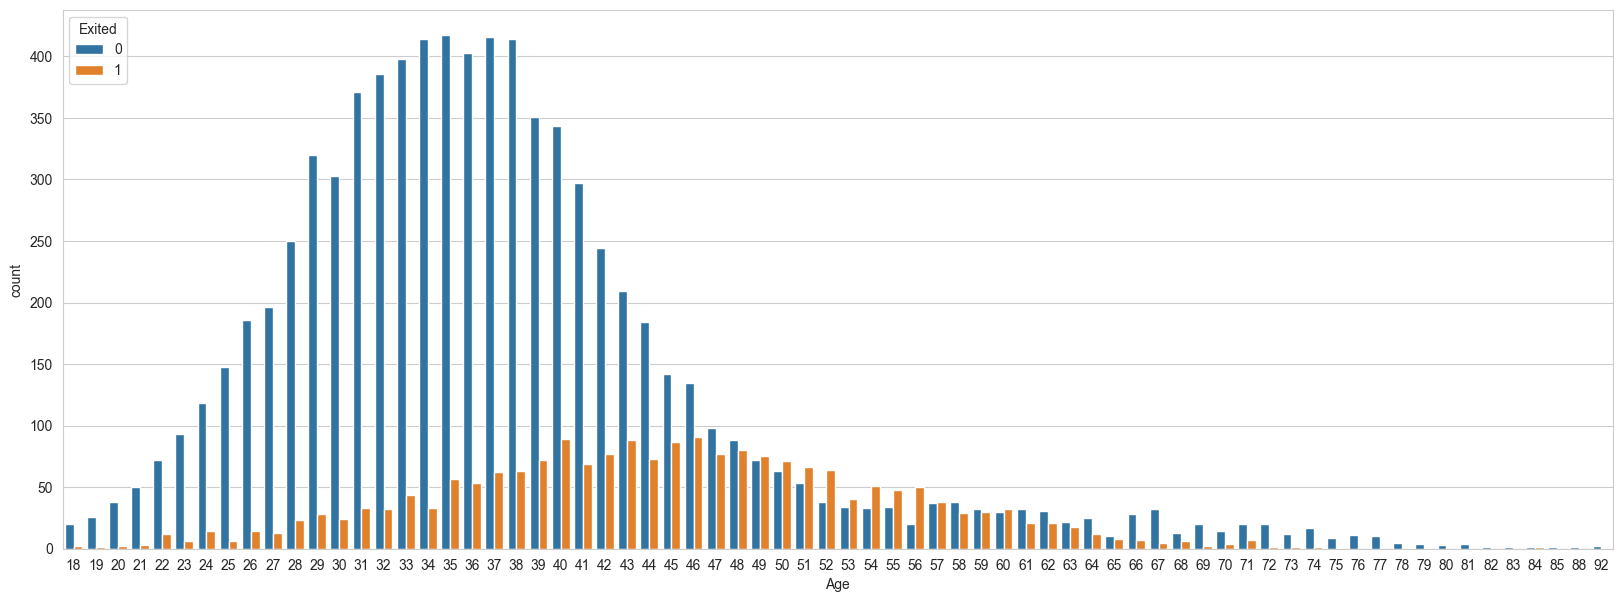

In [220]:
plt.figure(figsize = (20, 7))
sns.countplot(data = df, x = "Age", hue = "Exited");

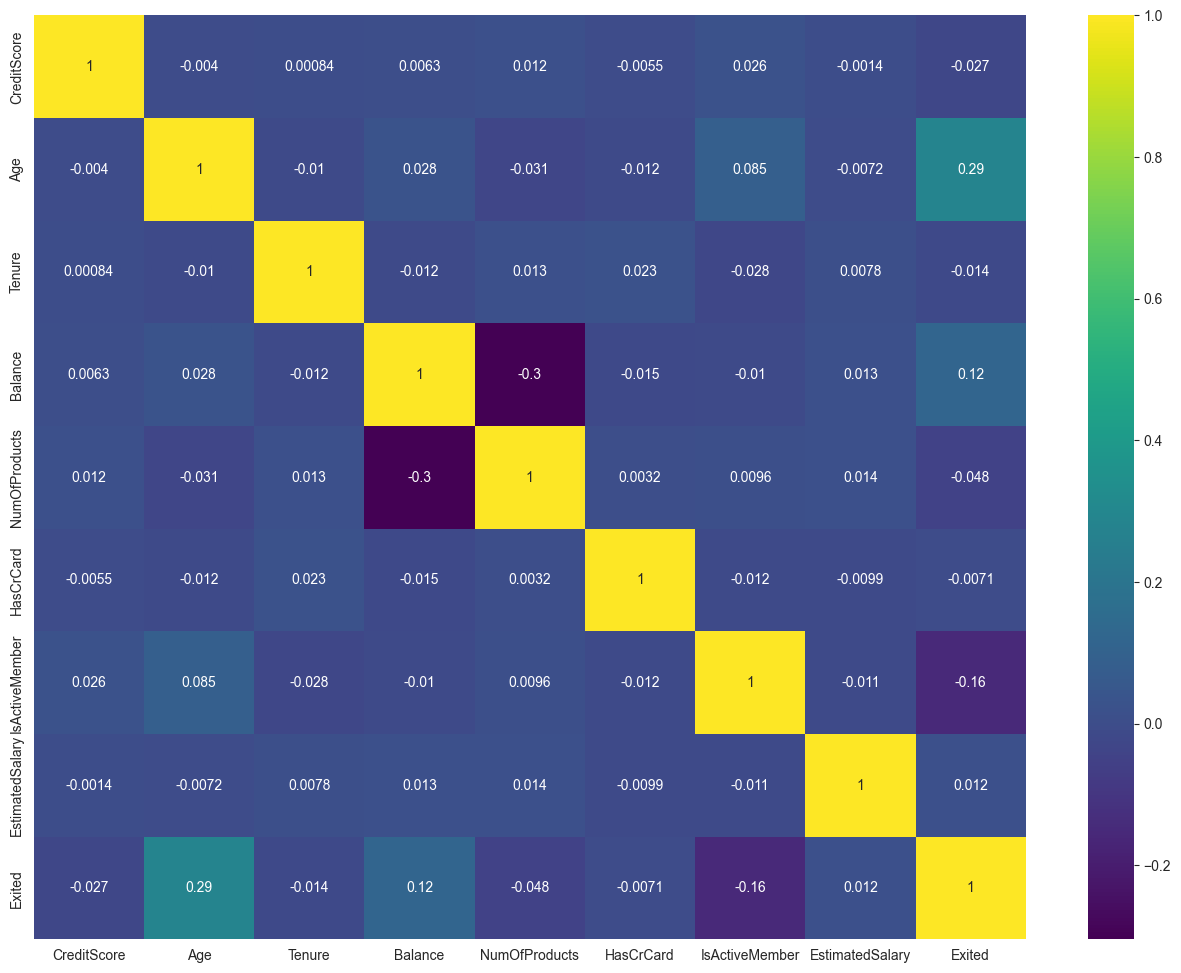

In [221]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, cmap = "viridis");

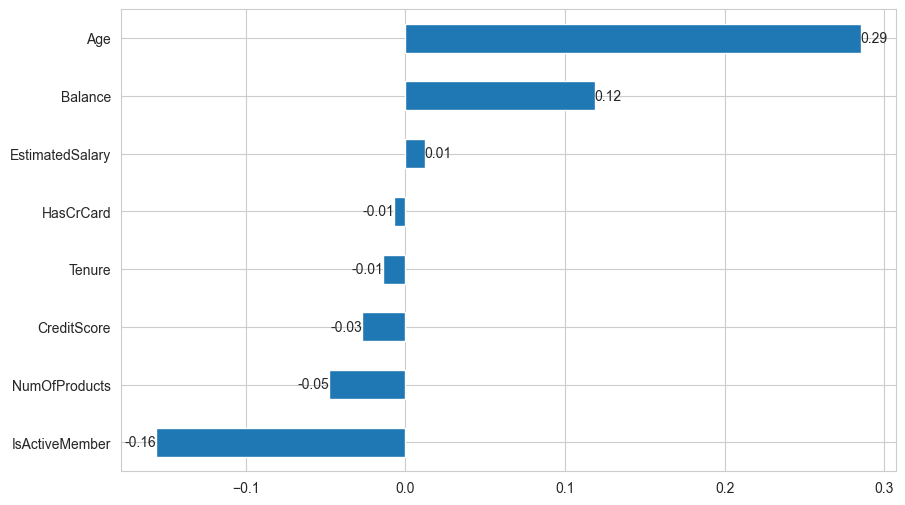

In [222]:
ax = df.corr()["Exited"][:-1].sort_values().plot.barh()
for i in ax.containers:
    ax.bar_label(i, fmt = "%.2f")

In [401]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [402]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown = "ignore"), ["Geography", "Gender"]), 
                                      remainder = "passthrough")
# Burada onehot encoder kullandık çünkü pd.get_dummies' e göre daha elverişli. 
# Burada farklı bir geography girdisi gelince model hata vermeyecek ignore edecek..

In [403]:
df = pd.DataFrame(transformer.fit_transform(df),
             columns = transformer.get_feature_names())
df

,onehotencoder__x0_France,onehotencoder__x0_Germany,onehotencoder__x0_Spain,onehotencoder__x1_Female,onehotencoder__x1_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.000,0.000,0.000,1.000,0.000,619.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.880,1.000
1,0.000,0.000,1.000,1.000,0.000,608.000,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580,0.000
2,1.000,0.000,0.000,1.000,0.000,502.000,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570,1.000
3,1.000,0.000,0.000,1.000,0.000,699.000,39.000,1.000,0.000,2.000,0.000,0.000,93826.630,0.000
4,0.000,0.000,1.000,1.000,0.000,850.000,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.000,0.000,0.000,0.000,1.000,771.000,39.000,5.000,0.000,2.000,1.000,0.000,96270.640,0.000
9996,1.000,0.000,0.000,0.000,1.000,516.000,35.000,10.000,57369.610,1.000,1.000,1.000,101699.770,0.000
9997,1.000,0.000,0.000,1.000,0.000,709.000,36.000,7.000,0.000,1.000,0.000,1.000,42085.580,1.000
9998,0.000,1.000,0.000,0.000,1.000,772.000,42.000,3.000,75075.310,2.000,1.000,0.000,92888.520,1.000


# Preprocessing of Data
- Train | Test Split, Scalling

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [408]:
seed = 42

In [409]:
X = df.drop(columns="Exited")
y = df["Exited"]

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.1, random_state = seed)
# Data'da imbalance durum olduğunu düşündüğümüz için stratify = y yaptık.

In [411]:
scaler = MinMaxScaler()

In [412]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [413]:
X_train.shape

(9000, 13)

## without class_weigth

### Create The Model

In [233]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1])) # Başlangıç olarak feature sayısının 1.5 katını seçtik.
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001) # Default değeri ile başladık.
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [234]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose = 1)
# Burada validation_split yerine validation_data = x_test, y_test de belirtebilirdik.

Epoch 1/300
64/64 [==============================] - 0s 3ms/step - loss: 0.6015 - recall: 0.0115 - val_loss: 0.5017 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4970 - recall: 0.0000e+00 - val_loss: 0.4778 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4819 - recall: 0.0000e+00 - val_loss: 0.4634 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4714 - recall: 0.0000e+00 - val_loss: 0.4528 - val_recall: 0.0000e+00
Epoch 5/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4635 - recall: 0.0000e+00 - val_loss: 0.4441 - val_recall: 0.0000e+00
Epoch 6/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4549 - recall: 0.0000e+00 - val_loss: 0.4336 - val_recall: 0.0000e+00
Epoch 7/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4476 - recall: 0.0000e+00 - val_loss: 0.4250 - val_recall: 

Epoch 60/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3372 - recall: 0.4764 - val_loss: 0.2973 - val_recall: 0.5470
Epoch 61/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3384 - recall: 0.4637 - val_loss: 0.2995 - val_recall: 0.5414
Epoch 62/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3371 - recall: 0.4746 - val_loss: 0.3034 - val_recall: 0.5912
Epoch 63/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3361 - recall: 0.4661 - val_loss: 0.3004 - val_recall: 0.5635
Epoch 64/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3375 - recall: 0.4703 - val_loss: 0.2996 - val_recall: 0.6022
Epoch 65/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3356 - recall: 0.4643 - val_loss: 0.2987 - val_recall: 0.5083
Epoch 66/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3369 - recall: 0.4697 - val_loss: 0.3080 - val_recall: 0.6022
Epoch 67/300
64/64 [==============

64/64 [==============================] - 0s 1ms/step - loss: 0.3307 - recall: 0.4855 - val_loss: 0.2998 - val_recall: 0.5580
Epoch 120/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3305 - recall: 0.4806 - val_loss: 0.2983 - val_recall: 0.5359
Epoch 121/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3303 - recall: 0.4927 - val_loss: 0.2962 - val_recall: 0.5580
Epoch 122/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3304 - recall: 0.4903 - val_loss: 0.2966 - val_recall: 0.5249
Epoch 123/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3305 - recall: 0.4770 - val_loss: 0.3050 - val_recall: 0.5580
Epoch 124/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3304 - recall: 0.4897 - val_loss: 0.2977 - val_recall: 0.5304
Epoch 125/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3306 - recall: 0.4970 - val_loss: 0.2954 - val_recall: 0.5580
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 1ms/step - loss: 0.3285 - recall: 0.4915 - val_loss: 0.2994 - val_recall: 0.6077
Epoch 179/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3270 - recall: 0.4982 - val_loss: 0.2976 - val_recall: 0.5249
Epoch 180/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3263 - recall: 0.4915 - val_loss: 0.2991 - val_recall: 0.5912
Epoch 181/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3265 - recall: 0.4976 - val_loss: 0.2998 - val_recall: 0.5525
Epoch 182/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3276 - recall: 0.4946 - val_loss: 0.2970 - val_recall: 0.5580
Epoch 183/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3267 - recall: 0.4933 - val_loss: 0.2954 - val_recall: 0.5470
Epoch 184/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3260 - recall: 0.4927 - val_loss: 0.2964 - val_recall: 0.5691
Epoch 185/300
64/64 [====================

Epoch 237/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3224 - recall: 0.5085 - val_loss: 0.3014 - val_recall: 0.5028
Epoch 238/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3240 - recall: 0.4958 - val_loss: 0.2981 - val_recall: 0.5470
Epoch 239/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3224 - recall: 0.5006 - val_loss: 0.3068 - val_recall: 0.5801
Epoch 240/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3238 - recall: 0.5079 - val_loss: 0.3016 - val_recall: 0.5138
Epoch 241/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3235 - recall: 0.4909 - val_loss: 0.3014 - val_recall: 0.5525
Epoch 242/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3233 - recall: 0.4976 - val_loss: 0.3025 - val_recall: 0.5083
Epoch 243/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3244 - recall: 0.4885 - val_loss: 0.2991 - val_recall: 0.5967
Epoch 244/300
64/64 [======

Epoch 296/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3225 - recall: 0.5036 - val_loss: 0.2986 - val_recall: 0.5691
Epoch 297/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3228 - recall: 0.4988 - val_loss: 0.3038 - val_recall: 0.5525
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3215 - recall: 0.5024 - val_loss: 0.3028 - val_recall: 0.5525
Epoch 299/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3216 - recall: 0.5073 - val_loss: 0.3006 - val_recall: 0.5470
Epoch 300/300
64/64 [==============================] - 0s 1ms/step - loss: 0.3211 - recall: 0.5006 - val_loss: 0.3033 - val_recall: 0.5304


In [235]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 539
Trainable params: 539
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<AxesSubplot:>

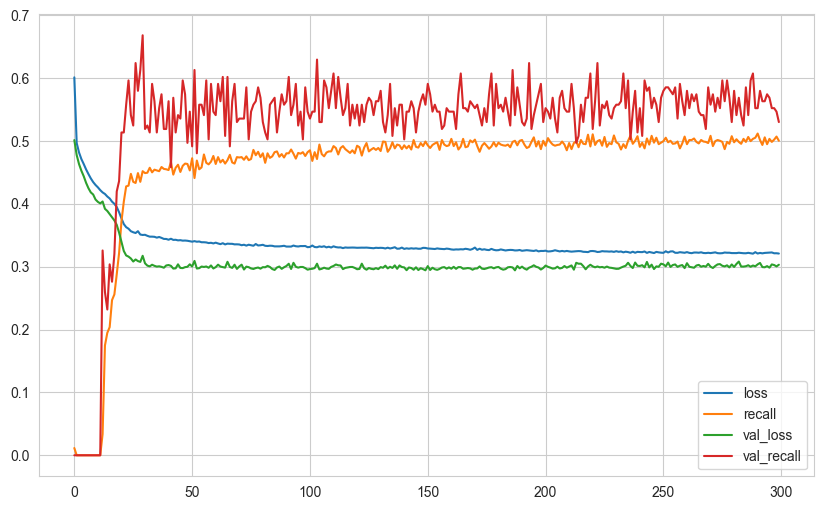

In [236]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [237]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Burada recall score'umuz target içi  0.49 çıkmış. Çok kötü. Demek ki datamızda kesinlikle imbalance durumu var.
# Bu yüzden class_weight kullanarak tekrar modelleyeceğiz.

32/32 [==============================] - 0s 855us/step
[[764  32]
 [112  92]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91       796
         1.0       0.74      0.45      0.56       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



32/32 [==============================] - 0s 760us/step


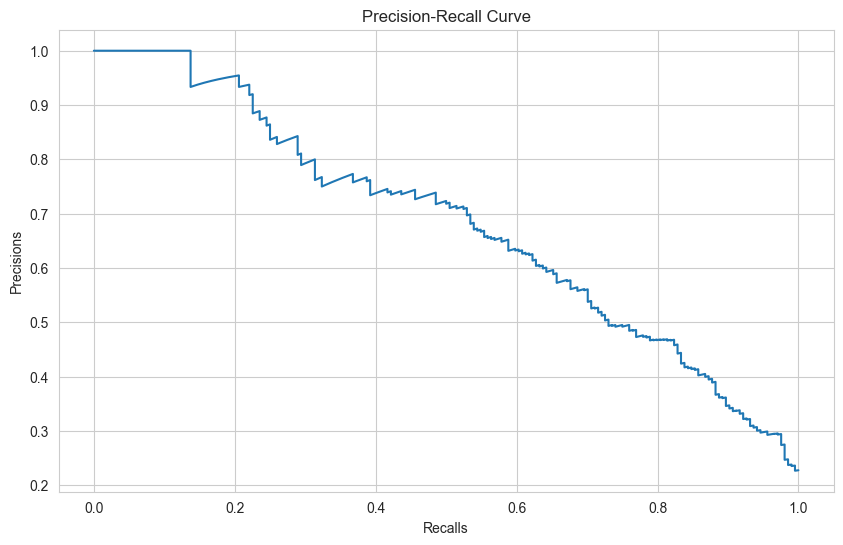

In [238]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

# Imbalance data durumunda Precision-Recall Curve üzerinden yorumlama yapıyoruz.

In [239]:
average_precision_score(y_test, y_pred_proba)

0.6816997187702221

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [240]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [241]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight("balanced", classes = np.unique(y_train), y = y_train)
class_weights = {0 : class_weights[0], 1 : class_weights[1]}
class_weights
# Burada katsayıları data miktarına göre ayarladı. Bu katsayılar manuel olarak da ayarlanabilir.
# Exited = 0 sayısı, Exited = 1 sayısının 4 katı idi bu yüzden 0 için düşük katsayı verdi 1 için onun 4 katı verdi ve dengeledi.

{0: 0.6278777731268314, 1: 2.454991816693944}

In [242]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 300, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/300
64/64 [==============================] - 1s 3ms/step - loss: 0.6797 - recall: 0.6344 - val_loss: 0.6501 - val_recall: 0.6409
Epoch 2/300
64/64 [==============================] - 0s 1ms/step - loss: 0.6507 - recall: 0.6108 - val_loss: 0.6216 - val_recall: 0.7182
Epoch 3/300
64/64 [==============================] - 0s 1ms/step - loss: 0.6307 - recall: 0.6386 - val_loss: 0.5833 - val_recall: 0.6575
Epoch 4/300
64/64 [==============================] - 0s 1ms/step - loss: 0.6178 - recall: 0.6834 - val_loss: 0.5623 - val_recall: 0.6740
Epoch 5/300
64/64 [==============================] - 0s 1ms/step - loss: 0.6082 - recall: 0.6913 - val_loss: 0.5929 - val_recall: 0.7569
Epoch 6/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5970 - recall: 0.7100 - val_loss: 0.5331 - val_recall: 0.6685
Epoch 7/300
64/64 [==============================] - 0s 1ms/step - loss: 0.5855 - recall: 0.6961 - val_loss: 0.5482 - val_recall: 0.7348
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 1ms/step - loss: 0.4607 - recall: 0.7676 - val_loss: 0.4175 - val_recall: 0.8232
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4611 - recall: 0.7718 - val_loss: 0.4278 - val_recall: 0.8287
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4581 - recall: 0.7712 - val_loss: 0.4668 - val_recall: 0.8453
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4579 - recall: 0.7748 - val_loss: 0.4298 - val_recall: 0.8232
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4603 - recall: 0.7676 - val_loss: 0.4553 - val_recall: 0.8508
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4570 - recall: 0.7742 - val_loss: 0.3844 - val_recall: 0.8011
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4605 - recall: 0.7651 - val_loss: 0.4658 - val_recall: 0.8508
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 1ms/step - loss: 0.4503 - recall: 0.7700 - val_loss: 0.3922 - val_recall: 0.8066
Epoch 120/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4501 - recall: 0.7736 - val_loss: 0.4071 - val_recall: 0.8177
Epoch 121/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4499 - recall: 0.7785 - val_loss: 0.4294 - val_recall: 0.8287
Epoch 122/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4522 - recall: 0.7851 - val_loss: 0.3788 - val_recall: 0.7790
Epoch 123/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4510 - recall: 0.7772 - val_loss: 0.4299 - val_recall: 0.8122
Epoch 124/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4506 - recall: 0.7657 - val_loss: 0.4002 - val_recall: 0.8011
Epoch 125/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4512 - recall: 0.7778 - val_loss: 0.4024 - val_recall: 0.8122
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 1ms/step - loss: 0.4478 - recall: 0.7821 - val_loss: 0.4634 - val_recall: 0.8343
Epoch 179/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4474 - recall: 0.7815 - val_loss: 0.3895 - val_recall: 0.8066
Epoch 180/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4457 - recall: 0.7748 - val_loss: 0.4559 - val_recall: 0.8287
Epoch 181/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4459 - recall: 0.7833 - val_loss: 0.4429 - val_recall: 0.8287
Epoch 182/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4479 - recall: 0.7821 - val_loss: 0.3973 - val_recall: 0.8066
Epoch 183/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4459 - recall: 0.7754 - val_loss: 0.4118 - val_recall: 0.8287
Epoch 184/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4461 - recall: 0.7797 - val_loss: 0.4369 - val_recall: 0.8287
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4429 - recall: 0.7900 - val_loss: 0.3638 - val_recall: 0.7680
Epoch 238/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4448 - recall: 0.7827 - val_loss: 0.3987 - val_recall: 0.7901
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4431 - recall: 0.7809 - val_loss: 0.4491 - val_recall: 0.8287
Epoch 240/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4435 - recall: 0.7803 - val_loss: 0.3912 - val_recall: 0.7901
Epoch 241/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4433 - recall: 0.7809 - val_loss: 0.4170 - val_recall: 0.8177
Epoch 242/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4429 - recall: 0.7881 - val_loss: 0.3821 - val_recall: 0.7790
Epoch 243/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4451 - recall: 0.7730 - val_loss: 0.4193 - val_recall: 0.8232
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 1ms/step - loss: 0.4432 - recall: 0.7863 - val_loss: 0.4156 - val_recall: 0.8287
Epoch 297/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4408 - recall: 0.7821 - val_loss: 0.3982 - val_recall: 0.8066
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4410 - recall: 0.7833 - val_loss: 0.4038 - val_recall: 0.8066
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4417 - recall: 0.7839 - val_loss: 0.3862 - val_recall: 0.7790
Epoch 300/300
64/64 [==============================] - 0s 1ms/step - loss: 0.4400 - recall: 0.7833 - val_loss: 0.4010 - val_recall: 0.7956


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

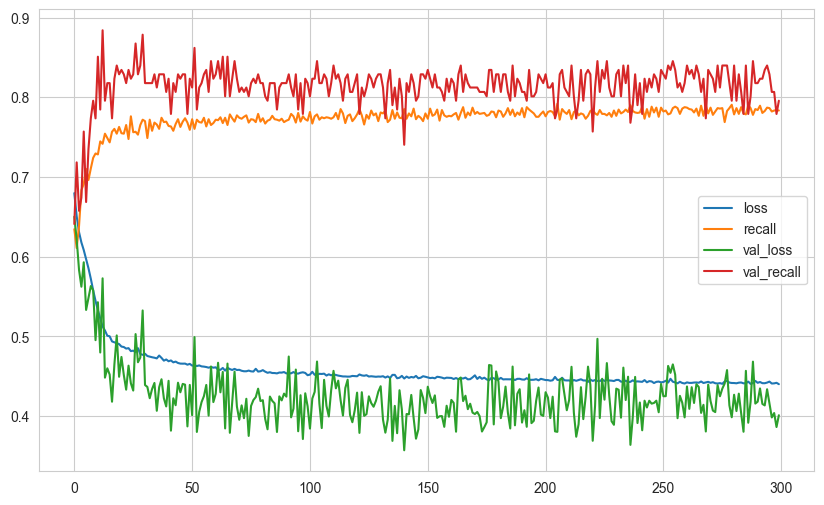

In [243]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [244]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Class-weight kullanarak aldığımız recall score'ları daha sağlıklı geldi. Tabii bu kez de precision score'ları düştü.

32/32 [==============================] - 0s 704us/step
[[631 165]
 [ 52 152]]
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       796
         1.0       0.48      0.75      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.78      0.80      1000



32/32 [==============================] - 0s 781us/step


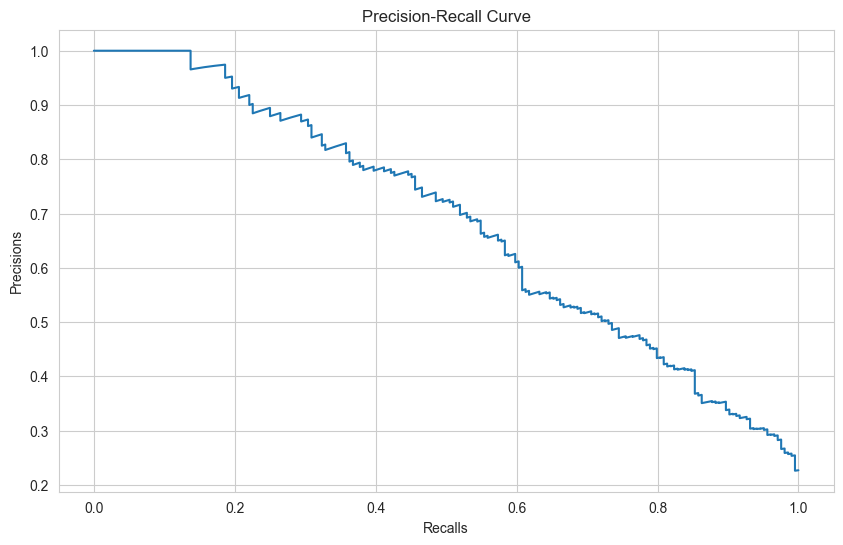

In [245]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [246]:
average_precision_score(y_test, y_pred_proba)

0.6836305382758718

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [275]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [276]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 1000, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.6708 - recall: 0.5666 - val_loss: 0.5586 - val_recall: 0.5912
Epoch 2/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.6397 - recall: 0.6628 - val_loss: 0.6706 - val_recall: 0.8619
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6097 - recall: 0.6895 - val_loss: 0.5284 - val_recall: 0.7182
Epoch 4/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.5771 - recall: 0.7185 - val_loss: 0.6045 - val_recall: 0.8508
Epoch 5/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.5616 - recall: 0.7433 - val_loss: 0.5036 - val_recall: 0.7790
Epoch 6/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.5390 - recall: 0.7488 - val_loss: 0.4506 - val_recall: 0.7459
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5319 - recall: 0.7615 - val_loss: 0.4381 - val_recall: 0.7569
Epoch 8/1000
64/64 [==============

64/64 [==============================] - 0s 1ms/step - loss: 0.4528 - recall: 0.7712 - val_loss: 0.4594 - val_recall: 0.8398
Epoch 61/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4549 - recall: 0.7736 - val_loss: 0.4455 - val_recall: 0.8232
Epoch 62/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4524 - recall: 0.7682 - val_loss: 0.4360 - val_recall: 0.8398
Epoch 63/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4501 - recall: 0.7730 - val_loss: 0.4106 - val_recall: 0.8011
Epoch 64/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4527 - recall: 0.7706 - val_loss: 0.4111 - val_recall: 0.8122
Epoch 65/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4488 - recall: 0.7669 - val_loss: 0.3933 - val_recall: 0.7956
Epoch 66/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4485 - recall: 0.7803 - val_loss: 0.4523 - val_recall: 0.8287
Epoch 67/1000
64/64 [====================

Epoch 119/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4305 - recall: 0.7827 - val_loss: 0.4096 - val_recall: 0.7901
Epoch 120/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4282 - recall: 0.7893 - val_loss: 0.4315 - val_recall: 0.7845
Epoch 121/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4268 - recall: 0.7887 - val_loss: 0.4709 - val_recall: 0.8564
Epoch 122/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4367 - recall: 0.7900 - val_loss: 0.3808 - val_recall: 0.7459
Epoch 123/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4323 - recall: 0.7821 - val_loss: 0.3880 - val_recall: 0.7624
Epoch 124/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4282 - recall: 0.7906 - val_loss: 0.4250 - val_recall: 0.7845
Epoch 125/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4303 - recall: 0.7845 - val_loss: 0.4317 - val_recall: 0.8011
Epoch 126/1000
64/64

64/64 [==============================] - 0s 1ms/step - loss: 0.4174 - recall: 0.7996 - val_loss: 0.4819 - val_recall: 0.8287
Epoch 178/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4181 - recall: 0.8008 - val_loss: 0.4518 - val_recall: 0.8011
Epoch 179/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4170 - recall: 0.7900 - val_loss: 0.4051 - val_recall: 0.7680
Epoch 180/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4174 - recall: 0.7972 - val_loss: 0.4371 - val_recall: 0.7901
Epoch 181/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4163 - recall: 0.7984 - val_loss: 0.4113 - val_recall: 0.7735
Epoch 182/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4196 - recall: 0.7887 - val_loss: 0.3760 - val_recall: 0.7459
Epoch 183/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4191 - recall: 0.7887 - val_loss: 0.4267 - val_recall: 0.7901
Epoch 184/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.4145 - recall: 0.8045 - val_loss: 0.4302 - val_recall: 0.7624
Epoch 236/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4121 - recall: 0.7948 - val_loss: 0.4773 - val_recall: 0.8066
Epoch 237/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4113 - recall: 0.8063 - val_loss: 0.3960 - val_recall: 0.7680
Epoch 238/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4134 - recall: 0.8027 - val_loss: 0.4195 - val_recall: 0.7680
Epoch 239/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4106 - recall: 0.8117 - val_loss: 0.4176 - val_recall: 0.7624
Epoch 240/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4113 - recall: 0.8015 - val_loss: 0.4042 - val_recall: 0.7514
Epoch 241/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4105 - recall: 0.8027 - val_loss: 0.4131 - val_recall: 0.7459
Epoch 242/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.4089 - recall: 0.8069 - val_loss: 0.4161 - val_recall: 0.7514
Epoch 294/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4051 - recall: 0.8099 - val_loss: 0.4216 - val_recall: 0.7845
Epoch 295/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4075 - recall: 0.8057 - val_loss: 0.4246 - val_recall: 0.7790
Epoch 296/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4090 - recall: 0.8002 - val_loss: 0.4648 - val_recall: 0.7956
Epoch 297/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4097 - recall: 0.7960 - val_loss: 0.4282 - val_recall: 0.7735
Epoch 298/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4063 - recall: 0.8051 - val_loss: 0.4099 - val_recall: 0.7624
Epoch 299/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4046 - recall: 0.8021 - val_loss: 0.4093 - val_recall: 0.7735
Epoch 300/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.4027 - recall: 0.8051 - val_loss: 0.3956 - val_recall: 0.7624
Epoch 352/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4022 - recall: 0.8117 - val_loss: 0.4614 - val_recall: 0.7901
Epoch 353/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4048 - recall: 0.8069 - val_loss: 0.4114 - val_recall: 0.7459
Epoch 354/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4031 - recall: 0.8027 - val_loss: 0.4612 - val_recall: 0.7901
Epoch 355/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4032 - recall: 0.8039 - val_loss: 0.4221 - val_recall: 0.7680
Epoch 356/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4065 - recall: 0.8027 - val_loss: 0.4379 - val_recall: 0.7901
Epoch 357/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4016 - recall: 0.8027 - val_loss: 0.4061 - val_recall: 0.7293
Epoch 358/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.4013 - recall: 0.8111 - val_loss: 0.4470 - val_recall: 0.7845
Epoch 410/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4023 - recall: 0.8063 - val_loss: 0.4381 - val_recall: 0.7790
Epoch 411/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4024 - recall: 0.8184 - val_loss: 0.4340 - val_recall: 0.7459
Epoch 412/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4011 - recall: 0.8033 - val_loss: 0.4700 - val_recall: 0.7845
Epoch 413/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4016 - recall: 0.8136 - val_loss: 0.4154 - val_recall: 0.7569
Epoch 414/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4004 - recall: 0.8051 - val_loss: 0.4763 - val_recall: 0.7901
Epoch 415/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4017 - recall: 0.8045 - val_loss: 0.4208 - val_recall: 0.7569
Epoch 416/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3953 - recall: 0.8208 - val_loss: 0.4268 - val_recall: 0.7403
Epoch 468/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4010 - recall: 0.8033 - val_loss: 0.4608 - val_recall: 0.7845
Epoch 469/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4021 - recall: 0.8142 - val_loss: 0.4139 - val_recall: 0.7348
Epoch 470/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4014 - recall: 0.8130 - val_loss: 0.4744 - val_recall: 0.8011
Epoch 471/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3962 - recall: 0.8069 - val_loss: 0.5008 - val_recall: 0.8011
Epoch 472/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3991 - recall: 0.8093 - val_loss: 0.4588 - val_recall: 0.7735
Epoch 473/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3996 - recall: 0.8111 - val_loss: 0.4561 - val_recall: 0.7956
Epoch 474/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3949 - recall: 0.8130 - val_loss: 0.4493 - val_recall: 0.7624
Epoch 526/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3924 - recall: 0.8087 - val_loss: 0.4270 - val_recall: 0.7735
Epoch 527/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3962 - recall: 0.8069 - val_loss: 0.4537 - val_recall: 0.8066
Epoch 528/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3955 - recall: 0.8142 - val_loss: 0.5066 - val_recall: 0.7845
Epoch 529/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3939 - recall: 0.8166 - val_loss: 0.4771 - val_recall: 0.7956
Epoch 530/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3923 - recall: 0.8123 - val_loss: 0.4862 - val_recall: 0.8011
Epoch 531/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3960 - recall: 0.8190 - val_loss: 0.4134 - val_recall: 0.7459
Epoch 532/1000
64/64 [=============

64/64 [==============================] - 0s 2ms/step - loss: 0.3911 - recall: 0.8111 - val_loss: 0.4499 - val_recall: 0.7735
Epoch 584/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3895 - recall: 0.8160 - val_loss: 0.4238 - val_recall: 0.7624
Epoch 585/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3898 - recall: 0.8166 - val_loss: 0.4538 - val_recall: 0.7790
Epoch 586/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3891 - recall: 0.8105 - val_loss: 0.4258 - val_recall: 0.7348
Epoch 587/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3903 - recall: 0.8087 - val_loss: 0.4581 - val_recall: 0.7790
Epoch 588/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3899 - recall: 0.8178 - val_loss: 0.4163 - val_recall: 0.7569
Epoch 589/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3909 - recall: 0.8172 - val_loss: 0.4482 - val_recall: 0.7735
Epoch 590/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3885 - recall: 0.8214 - val_loss: 0.4645 - val_recall: 0.7680
Epoch 642/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3882 - recall: 0.8226 - val_loss: 0.4319 - val_recall: 0.7514
Epoch 643/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3912 - recall: 0.8190 - val_loss: 0.4269 - val_recall: 0.7459
Epoch 644/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3897 - recall: 0.8136 - val_loss: 0.4450 - val_recall: 0.7680
Epoch 645/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3855 - recall: 0.8329 - val_loss: 0.4112 - val_recall: 0.7403
Epoch 646/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3910 - recall: 0.8136 - val_loss: 0.4092 - val_recall: 0.7514
Epoch 647/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3947 - recall: 0.8172 - val_loss: 0.4653 - val_recall: 0.7845
Epoch 648/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3859 - recall: 0.8202 - val_loss: 0.4273 - val_recall: 0.7735
Epoch 700/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3860 - recall: 0.8245 - val_loss: 0.4518 - val_recall: 0.7569
Epoch 701/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3882 - recall: 0.8154 - val_loss: 0.4905 - val_recall: 0.7735
Epoch 702/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3896 - recall: 0.8148 - val_loss: 0.4475 - val_recall: 0.7735
Epoch 703/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3921 - recall: 0.8178 - val_loss: 0.4222 - val_recall: 0.7459
Epoch 704/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3889 - recall: 0.8196 - val_loss: 0.4073 - val_recall: 0.7514
Epoch 705/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3845 - recall: 0.8130 - val_loss: 0.5157 - val_recall: 0.8122
Epoch 706/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3839 - recall: 0.8269 - val_loss: 0.4674 - val_recall: 0.8011
Epoch 758/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3860 - recall: 0.8154 - val_loss: 0.4315 - val_recall: 0.7790
Epoch 759/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3830 - recall: 0.8196 - val_loss: 0.4536 - val_recall: 0.7956
Epoch 760/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3886 - recall: 0.8202 - val_loss: 0.4455 - val_recall: 0.7735
Epoch 761/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3896 - recall: 0.8220 - val_loss: 0.4629 - val_recall: 0.7790
Epoch 762/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3924 - recall: 0.8142 - val_loss: 0.4521 - val_recall: 0.7735
Epoch 763/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3850 - recall: 0.8142 - val_loss: 0.4785 - val_recall: 0.8066
Epoch 764/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3868 - recall: 0.8287 - val_loss: 0.4344 - val_recall: 0.7680
Epoch 816/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3855 - recall: 0.8166 - val_loss: 0.4327 - val_recall: 0.7735
Epoch 817/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3846 - recall: 0.8202 - val_loss: 0.4023 - val_recall: 0.7403
Epoch 818/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3844 - recall: 0.8160 - val_loss: 0.4647 - val_recall: 0.8177
Epoch 819/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3806 - recall: 0.8275 - val_loss: 0.4270 - val_recall: 0.7514
Epoch 820/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3864 - recall: 0.8099 - val_loss: 0.4932 - val_recall: 0.8177
Epoch 821/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3829 - recall: 0.8208 - val_loss: 0.4590 - val_recall: 0.8011
Epoch 822/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3887 - recall: 0.8287 - val_loss: 0.3993 - val_recall: 0.7514
Epoch 874/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3869 - recall: 0.8099 - val_loss: 0.4418 - val_recall: 0.8011
Epoch 875/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3877 - recall: 0.8251 - val_loss: 0.4384 - val_recall: 0.7735
Epoch 876/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3852 - recall: 0.8123 - val_loss: 0.4362 - val_recall: 0.7956
Epoch 877/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3853 - recall: 0.8245 - val_loss: 0.5039 - val_recall: 0.8232
Epoch 878/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3823 - recall: 0.8214 - val_loss: 0.4739 - val_recall: 0.7956
Epoch 879/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3860 - recall: 0.8245 - val_loss: 0.4152 - val_recall: 0.7459
Epoch 880/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3822 - recall: 0.8226 - val_loss: 0.4453 - val_recall: 0.7901
Epoch 932/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3807 - recall: 0.8232 - val_loss: 0.4242 - val_recall: 0.7514
Epoch 933/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3805 - recall: 0.8202 - val_loss: 0.4557 - val_recall: 0.8011
Epoch 934/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3851 - recall: 0.8148 - val_loss: 0.4583 - val_recall: 0.8066
Epoch 935/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3822 - recall: 0.8214 - val_loss: 0.4655 - val_recall: 0.7901
Epoch 936/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3856 - recall: 0.8160 - val_loss: 0.4532 - val_recall: 0.7956
Epoch 937/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.3819 - recall: 0.8238 - val_loss: 0.4236 - val_recall: 0.7790
Epoch 938/1000
64/64 [=============

64/64 [==============================] - 0s 1ms/step - loss: 0.3826 - recall: 0.8166 - val_loss: 0.4970 - val_recall: 0.8453
Epoch 990/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3783 - recall: 0.8287 - val_loss: 0.4332 - val_recall: 0.7680
Epoch 991/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3787 - recall: 0.8148 - val_loss: 0.4380 - val_recall: 0.8011
Epoch 992/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3776 - recall: 0.8287 - val_loss: 0.4457 - val_recall: 0.7790
Epoch 993/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3810 - recall: 0.8220 - val_loss: 0.4575 - val_recall: 0.8122
Epoch 994/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3814 - recall: 0.8178 - val_loss: 0.4157 - val_recall: 0.7790
Epoch 995/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.3793 - recall: 0.8196 - val_loss: 0.4261 - val_recall: 0.7845
Epoch 996/1000
64/64 [=============

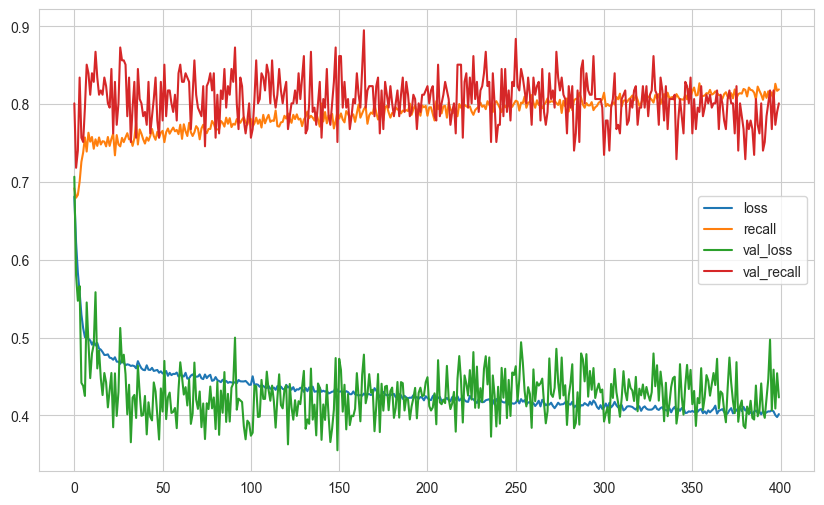

In [249]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

# Buradan grafiğe bakarak overfitting'e gitmeye başladığını görüyoruz.
# Bunu engellemek için dropout ekleyebilirz veya early_stop yapabiliriz.

In [251]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 700us/step
[[618 178]
 [ 50 154]]
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.84       796
         1.0       0.46      0.75      0.57       204

    accuracy                           0.77      1000
   macro avg       0.69      0.77      0.71      1000
weighted avg       0.83      0.77      0.79      1000



### Add Dropout Layer

In [252]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2)) # 0.2 seçmek zorunda değiliz burası biraz deneysel...
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [253]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 400, 
          verbose = 1, 
          class_weight = class_weights)

Epoch 1/400
64/64 [==============================] - 0s 3ms/step - loss: 0.6797 - recall: 0.5085 - val_loss: 0.6566 - val_recall: 0.6851
Epoch 2/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6560 - recall: 0.5248 - val_loss: 0.6214 - val_recall: 0.7182
Epoch 3/400
64/64 [==============================] - 0s 1ms/step - loss: 0.6458 - recall: 0.5696 - val_loss: 0.5984 - val_recall: 0.7293
Epoch 4/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6292 - recall: 0.6362 - val_loss: 0.5882 - val_recall: 0.7293
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6150 - recall: 0.6792 - val_loss: 0.5620 - val_recall: 0.6961
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6064 - recall: 0.6592 - val_loss: 0.5488 - val_recall: 0.7072
Epoch 7/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6036 - recall: 0.6737 - val_loss: 0.5811 - val_recall: 0.8122
Epoch 8/400
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.5084 - recall: 0.7143 - val_loss: 0.4417 - val_recall: 0.8011
Epoch 61/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5035 - recall: 0.6907 - val_loss: 0.3933 - val_recall: 0.7735
Epoch 62/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5111 - recall: 0.7010 - val_loss: 0.4771 - val_recall: 0.8398
Epoch 63/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5088 - recall: 0.6967 - val_loss: 0.4555 - val_recall: 0.8232
Epoch 64/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5110 - recall: 0.6961 - val_loss: 0.4514 - val_recall: 0.8177
Epoch 65/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5088 - recall: 0.7058 - val_loss: 0.4233 - val_recall: 0.7901
Epoch 66/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5038 - recall: 0.6973 - val_loss: 0.4511 - val_recall: 0.8066
Epoch 67/400
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.4971 - recall: 0.7082 - val_loss: 0.4378 - val_recall: 0.8287
Epoch 120/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5028 - recall: 0.7258 - val_loss: 0.4248 - val_recall: 0.7901
Epoch 121/400
64/64 [==============================] - 0s 1ms/step - loss: 0.4984 - recall: 0.7197 - val_loss: 0.4546 - val_recall: 0.8232
Epoch 122/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5013 - recall: 0.7373 - val_loss: 0.4274 - val_recall: 0.8122
Epoch 123/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5008 - recall: 0.7076 - val_loss: 0.4426 - val_recall: 0.8287
Epoch 124/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4969 - recall: 0.7349 - val_loss: 0.4247 - val_recall: 0.7901
Epoch 125/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4999 - recall: 0.7107 - val_loss: 0.4445 - val_recall: 0.8287
Epoch 126/400
64/64 [====================

64/64 [==============================] - 0s 1ms/step - loss: 0.4882 - recall: 0.7282 - val_loss: 0.4278 - val_recall: 0.8122
Epoch 179/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4914 - recall: 0.7264 - val_loss: 0.4428 - val_recall: 0.8122
Epoch 180/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4910 - recall: 0.7300 - val_loss: 0.4259 - val_recall: 0.8122
Epoch 181/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4867 - recall: 0.7258 - val_loss: 0.4153 - val_recall: 0.7845
Epoch 182/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4949 - recall: 0.7276 - val_loss: 0.4410 - val_recall: 0.8232
Epoch 183/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4923 - recall: 0.7415 - val_loss: 0.4194 - val_recall: 0.8177
Epoch 184/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4957 - recall: 0.7458 - val_loss: 0.4209 - val_recall: 0.7901
Epoch 185/400
64/64 [====================

64/64 [==============================] - 0s 1ms/step - loss: 0.4841 - recall: 0.7397 - val_loss: 0.3925 - val_recall: 0.7680
Epoch 238/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4933 - recall: 0.7209 - val_loss: 0.4360 - val_recall: 0.8343
Epoch 239/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4843 - recall: 0.7312 - val_loss: 0.4462 - val_recall: 0.8177
Epoch 240/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4957 - recall: 0.7167 - val_loss: 0.4162 - val_recall: 0.8011
Epoch 241/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4878 - recall: 0.7367 - val_loss: 0.4065 - val_recall: 0.7956
Epoch 242/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4947 - recall: 0.7246 - val_loss: 0.4129 - val_recall: 0.7901
Epoch 243/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4922 - recall: 0.7367 - val_loss: 0.4302 - val_recall: 0.8232
Epoch 244/400
64/64 [====================

64/64 [==============================] - 0s 1ms/step - loss: 0.4887 - recall: 0.7191 - val_loss: 0.4397 - val_recall: 0.8122
Epoch 297/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4878 - recall: 0.7427 - val_loss: 0.4290 - val_recall: 0.8122
Epoch 298/400
64/64 [==============================] - 0s 1ms/step - loss: 0.4883 - recall: 0.7361 - val_loss: 0.4587 - val_recall: 0.8453
Epoch 299/400
64/64 [==============================] - 0s 1ms/step - loss: 0.4942 - recall: 0.7312 - val_loss: 0.4317 - val_recall: 0.8066
Epoch 300/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4946 - recall: 0.7215 - val_loss: 0.4188 - val_recall: 0.7845
Epoch 301/400
64/64 [==============================] - 0s 1ms/step - loss: 0.4865 - recall: 0.7379 - val_loss: 0.4318 - val_recall: 0.8066
Epoch 302/400
64/64 [==============================] - 0s 1ms/step - loss: 0.4863 - recall: 0.7464 - val_loss: 0.4082 - val_recall: 0.7845
Epoch 303/400
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4919 - recall: 0.7343 - val_loss: 0.4496 - val_recall: 0.8343
Epoch 356/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4872 - recall: 0.7397 - val_loss: 0.4206 - val_recall: 0.8232
Epoch 357/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4877 - recall: 0.7222 - val_loss: 0.4438 - val_recall: 0.8122
Epoch 358/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4912 - recall: 0.7173 - val_loss: 0.4372 - val_recall: 0.8122
Epoch 359/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4911 - recall: 0.7215 - val_loss: 0.4436 - val_recall: 0.8232
Epoch 360/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4890 - recall: 0.7076 - val_loss: 0.4434 - val_recall: 0.8177
Epoch 361/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4897 - recall: 0.7391 - val_loss: 0.4098 - val_recall: 0.7790
Epoch 362/400
64/64 [====================

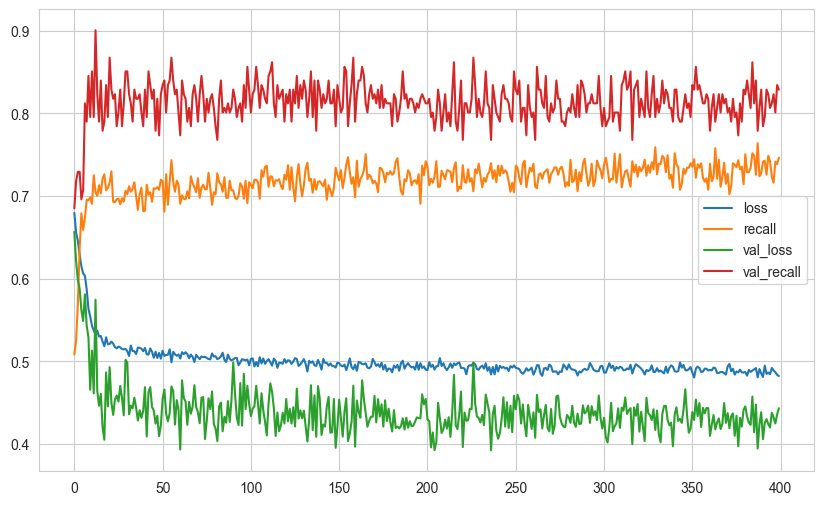

In [255]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [256]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Dropout kullanınca skore'larımız iyileşti ve overfitting durumundan kurtulduk

32/32 [==============================] - 0s 737us/step
[[587 209]
 [ 40 164]]
              precision    recall  f1-score   support

         0.0       0.94      0.74      0.83       796
         1.0       0.44      0.80      0.57       204

    accuracy                           0.75      1000
   macro avg       0.69      0.77      0.70      1000
weighted avg       0.83      0.75      0.77      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [257]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2)) # 0.2 seçmek zorunda değiliz burası biraz deneysel...
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])


In [266]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 100, restore_best_weights = True)

In [267]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 400, 
          verbose = 1, 
          class_weight = class_weights,
          callbacks = [early_stop])

Epoch 1/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5055 - recall: 0.6755 - val_loss: 0.4412 - val_recall: 0.7624
Epoch 2/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5074 - recall: 0.6810 - val_loss: 0.4355 - val_recall: 0.7569
Epoch 3/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5090 - recall: 0.6683 - val_loss: 0.4053 - val_recall: 0.7348
Epoch 4/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5149 - recall: 0.6628 - val_loss: 0.4010 - val_recall: 0.7127
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5066 - recall: 0.6689 - val_loss: 0.4276 - val_recall: 0.7569
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5167 - recall: 0.6574 - val_loss: 0.4084 - val_recall: 0.7072
Epoch 7/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5027 - recall: 0.6852 - val_loss: 0.4398 - val_recall: 0.7680
Epoch 8/400
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.5018 - recall: 0.6798 - val_loss: 0.4206 - val_recall: 0.7238
Epoch 61/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5059 - recall: 0.6774 - val_loss: 0.4083 - val_recall: 0.7403
Epoch 62/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5070 - recall: 0.6725 - val_loss: 0.4710 - val_recall: 0.7956
Epoch 63/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5036 - recall: 0.6713 - val_loss: 0.4321 - val_recall: 0.7845
Epoch 64/400
64/64 [==============================] - 0s 1ms/step - loss: 0.5013 - recall: 0.6822 - val_loss: 0.4394 - val_recall: 0.7901
Epoch 65/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5068 - recall: 0.6719 - val_loss: 0.4123 - val_recall: 0.7127
Epoch 66/400
64/64 [==============================] - 0s 1ms/step - loss: 0.5025 - recall: 0.6822 - val_loss: 0.4347 - val_recall: 0.7680
Epoch 67/400
64/64 [===========================

64/64 [==============================] - 0s 1ms/step - loss: 0.5006 - recall: 0.6925 - val_loss: 0.4202 - val_recall: 0.7680
Epoch 120/400
64/64 [==============================] - 0s 1ms/step - loss: 0.5034 - recall: 0.6719 - val_loss: 0.4150 - val_recall: 0.7127
Epoch 121/400
64/64 [==============================] - 0s 1ms/step - loss: 0.5075 - recall: 0.6725 - val_loss: 0.4132 - val_recall: 0.7182
Epoch 122/400
64/64 [==============================] - 0s 1ms/step - loss: 0.4955 - recall: 0.6992 - val_loss: 0.4223 - val_recall: 0.7569
Epoch 123/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4940 - recall: 0.6913 - val_loss: 0.4443 - val_recall: 0.7680
Epoch 124/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5010 - recall: 0.6792 - val_loss: 0.4083 - val_recall: 0.7182
Epoch 125/400
64/64 [==============================] - 0s 1ms/step - loss: 0.5029 - recall: 0.6834 - val_loss: 0.4321 - val_recall: 0.7735
Epoch 126/400
64/64 [====================

64/64 [==============================] - 0s 1ms/step - loss: 0.4886 - recall: 0.6943 - val_loss: 0.4216 - val_recall: 0.7569
Epoch 179/400
64/64 [==============================] - 0s 1ms/step - loss: 0.4992 - recall: 0.6883 - val_loss: 0.4067 - val_recall: 0.7293
Epoch 180/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4955 - recall: 0.6762 - val_loss: 0.4351 - val_recall: 0.7735
Epoch 181/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4968 - recall: 0.6846 - val_loss: 0.4123 - val_recall: 0.7459
Epoch 182/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4899 - recall: 0.6762 - val_loss: 0.4116 - val_recall: 0.7459
Epoch 183/400
64/64 [==============================] - 0s 1ms/step - loss: 0.4979 - recall: 0.6864 - val_loss: 0.4131 - val_recall: 0.7624
Epoch 184/400
64/64 [==============================] - 0s 1ms/step - loss: 0.4900 - recall: 0.6907 - val_loss: 0.4046 - val_recall: 0.7348
Epoch 185/400
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4933 - recall: 0.6973 - val_loss: 0.4095 - val_recall: 0.7127
Epoch 238/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4892 - recall: 0.6774 - val_loss: 0.4280 - val_recall: 0.7790
Epoch 239/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4940 - recall: 0.6877 - val_loss: 0.4354 - val_recall: 0.7403
Epoch 240/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4996 - recall: 0.6810 - val_loss: 0.4230 - val_recall: 0.7403
Epoch 241/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5023 - recall: 0.6816 - val_loss: 0.4222 - val_recall: 0.7569
Epoch 242/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4910 - recall: 0.6961 - val_loss: 0.4006 - val_recall: 0.7293
Epoch 243/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4865 - recall: 0.6967 - val_loss: 0.4201 - val_recall: 0.7569
Epoch 244/400
64/64 [====================

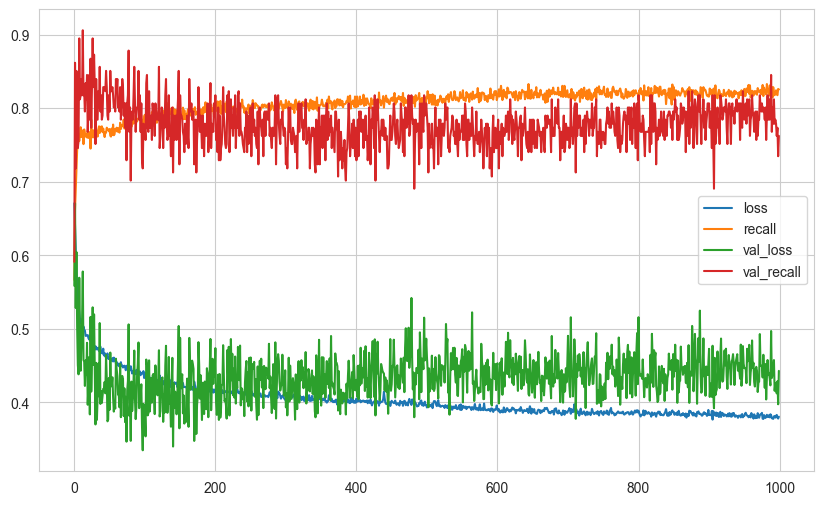

In [277]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [278]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 452us/step
[[630 166]
 [ 55 149]]
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85       796
         1.0       0.47      0.73      0.57       204

    accuracy                           0.78      1000
   macro avg       0.70      0.76      0.71      1000
weighted avg       0.83      0.78      0.79      1000



#### Monitor the "val_recall" as metric

In [287]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.2)) # 0.2 seçmek zorunda değiliz burası biraz deneysel...
model.add(Dense(10, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])
# Burada metrics'i accuracy yapsaydık monitor olarak val_accuracy' e da bakabilirdik.
# Burada metrics olarak recall seçtiğimiz için monitor olarak da val_recall' u seçeceğiz.

In [288]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 200, restore_best_weights = True)
# Recall değerini maximize etmek istediğimiz için mode = "max" yazdık.

In [289]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split = 0.1, 
          batch_size = 128, 
          epochs = 1000, 
          verbose = 1, 
          class_weight = class_weights,
          callbacks = [early_stop])

Epoch 1/1000
64/64 [==============================] - 0s 3ms/step - loss: 0.7091 - recall: 0.7833 - val_loss: 0.7031 - val_recall: 0.7403
Epoch 2/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6785 - recall: 0.4976 - val_loss: 0.6769 - val_recall: 0.6354
Epoch 3/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6620 - recall: 0.4837 - val_loss: 0.6548 - val_recall: 0.6796
Epoch 4/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6477 - recall: 0.5115 - val_loss: 0.6013 - val_recall: 0.6188
Epoch 5/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6386 - recall: 0.4927 - val_loss: 0.5826 - val_recall: 0.6022
Epoch 6/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6314 - recall: 0.4946 - val_loss: 0.5518 - val_recall: 0.6740
Epoch 7/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.6232 - recall: 0.5139 - val_loss: 0.5856 - val_recall: 0.7348
Epoch 8/1000
64/64 [==============

64/64 [==============================] - 0s 2ms/step - loss: 0.5019 - recall: 0.7615 - val_loss: 0.4026 - val_recall: 0.8066
Epoch 61/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5002 - recall: 0.7464 - val_loss: 0.4208 - val_recall: 0.8232
Epoch 62/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5058 - recall: 0.7318 - val_loss: 0.5129 - val_recall: 0.8785
Epoch 63/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5133 - recall: 0.7155 - val_loss: 0.4706 - val_recall: 0.8508
Epoch 64/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5061 - recall: 0.7506 - val_loss: 0.4929 - val_recall: 0.8895
Epoch 65/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5017 - recall: 0.7488 - val_loss: 0.4106 - val_recall: 0.7845
Epoch 66/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5059 - recall: 0.7397 - val_loss: 0.4933 - val_recall: 0.8453
Epoch 67/1000
64/64 [====================

Epoch 119/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4983 - recall: 0.6937 - val_loss: 0.4406 - val_recall: 0.8232
Epoch 120/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5060 - recall: 0.7125 - val_loss: 0.4138 - val_recall: 0.8011
Epoch 121/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5046 - recall: 0.7772 - val_loss: 0.4527 - val_recall: 0.8398
Epoch 122/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5017 - recall: 0.7821 - val_loss: 0.4069 - val_recall: 0.8011
Epoch 123/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.4994 - recall: 0.6907 - val_loss: 0.4547 - val_recall: 0.8177
Epoch 124/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4986 - recall: 0.7058 - val_loss: 0.3963 - val_recall: 0.7901
Epoch 125/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4973 - recall: 0.6925 - val_loss: 0.4206 - val_recall: 0.7901
Epoch 126/1000
64/64

64/64 [==============================] - 0s 2ms/step - loss: 0.4942 - recall: 0.8166 - val_loss: 0.4853 - val_recall: 0.8729
Epoch 178/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4926 - recall: 0.7439 - val_loss: 0.4264 - val_recall: 0.8011
Epoch 179/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4949 - recall: 0.7918 - val_loss: 0.4124 - val_recall: 0.8177
Epoch 180/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4931 - recall: 0.7948 - val_loss: 0.4618 - val_recall: 0.8729
Epoch 181/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4986 - recall: 0.7942 - val_loss: 0.4258 - val_recall: 0.8122
Epoch 182/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5000 - recall: 0.7960 - val_loss: 0.4259 - val_recall: 0.8122
Epoch 183/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5029 - recall: 0.7912 - val_loss: 0.4174 - val_recall: 0.7956
Epoch 184/1000
64/64 [=============

64/64 [==============================] - 0s 2ms/step - loss: 0.4940 - recall: 0.6798 - val_loss: 0.4437 - val_recall: 0.7956
Epoch 236/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5036 - recall: 0.6586 - val_loss: 0.4183 - val_recall: 0.7901
Epoch 237/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.5014 - recall: 0.6683 - val_loss: 0.4684 - val_recall: 0.7790
Epoch 238/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.5023 - recall: 0.6755 - val_loss: 0.4312 - val_recall: 0.7956
Epoch 239/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4963 - recall: 0.6622 - val_loss: 0.4498 - val_recall: 0.8066
Epoch 240/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4963 - recall: 0.6762 - val_loss: 0.4370 - val_recall: 0.8011
Epoch 241/1000
64/64 [==============================] - 0s 2ms/step - loss: 0.4940 - recall: 0.6598 - val_loss: 0.4297 - val_recall: 0.7956
Epoch 242/1000
64/64 [=============

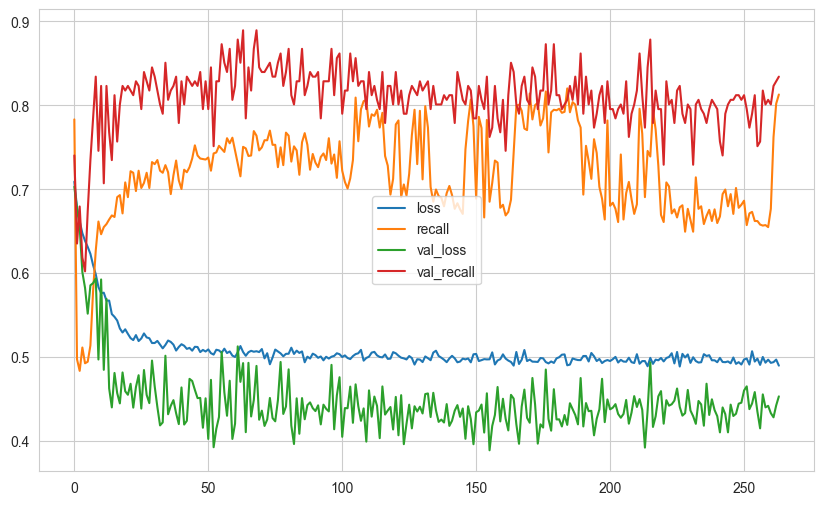

In [290]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [291]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 644us/step
[[527 269]
 [ 26 178]]
              precision    recall  f1-score   support

         0.0       0.95      0.66      0.78       796
         1.0       0.40      0.87      0.55       204

    accuracy                           0.70      1000
   macro avg       0.68      0.77      0.66      1000
weighted avg       0.84      0.70      0.73      1000



## GridSearchCV

In [292]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
# Burada wrappers kullanarak  keras ile scikit_learn'ün özelliklerini birleştiriyoruz.
# GridSearch'i scikit_learn'den aldık.
# regresyon yapıyor olsaydık KerasRegression kullanacaktık.

In [293]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 20, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 10, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 4, activation = "relu"))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = "sigmoid"))
    classifier.compile(optimizer = optimizer(learn_rate), loss = "binary_crossentropy", metrics = ["Recall"])
    return classifier

In [294]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [295]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 100, restore_best_weights = True)

In [297]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

classifier = KerasClassifier(build_fn =  build_classifier, validation_split = 0.1, epochs = 1000)

parameters = {"batch_size" : [128, 256],
              "optimizer" : [Adam, RMSprop, Adadelta, Nadam],
              "learn_rate" : [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = "recall",
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight = class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/1000
32/32 [==============================] - 1s 5ms/step - loss: 0.6995 - recall: 0.4492 - val_loss: 0.6853 - val_recall: 0.3039
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6849 - recall: 0.4546 - val_loss: 0.6906 - val_recall: 0.5746
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6739 - recall: 0.5115 - val_loss: 0.6804 - val_recall: 0.5193
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6707 - recall: 0.4770 - val_loss: 0.6649 - val_recall: 0.5304
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6583 - recall: 0.5091 - val_loss: 0.6536 - val_recall: 0.5801
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6546 - recall: 0.5599 - val_loss: 0.6391 - val_recall: 0.6354
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6400 - recall: 0.5666 - val_loss: 

32/32 [==============================] - 0s 2ms/step - loss: 0.4958 - recall: 0.7058 - val_loss: 0.4777 - val_recall: 0.8177
Epoch 60/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4986 - recall: 0.6979 - val_loss: 0.4375 - val_recall: 0.7901
Epoch 61/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5001 - recall: 0.6943 - val_loss: 0.4240 - val_recall: 0.7901
Epoch 62/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4978 - recall: 0.6901 - val_loss: 0.4475 - val_recall: 0.8122
Epoch 63/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4997 - recall: 0.7010 - val_loss: 0.4275 - val_recall: 0.7901
Epoch 64/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4993 - recall: 0.7040 - val_loss: 0.4380 - val_recall: 0.7956
Epoch 65/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.5001 - recall: 0.6973 - val_loss: 0.4013 - val_recall: 0.7514
Epoch 66/1000
32/32 [====================

Epoch 118/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4924 - recall: 0.7131 - val_loss: 0.4152 - val_recall: 0.7790
Epoch 119/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4874 - recall: 0.7270 - val_loss: 0.4473 - val_recall: 0.7956
Epoch 120/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4878 - recall: 0.7209 - val_loss: 0.4388 - val_recall: 0.8066
Epoch 121/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4930 - recall: 0.7149 - val_loss: 0.4353 - val_recall: 0.8011
Epoch 122/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4893 - recall: 0.7349 - val_loss: 0.4317 - val_recall: 0.7901
Epoch 123/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4841 - recall: 0.7222 - val_loss: 0.4390 - val_recall: 0.7956
Epoch 124/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4899 - recall: 0.7312 - val_loss: 0.4233 - val_recall: 0.7845
Epoch 125/1000
32/32

32/32 [==============================] - 0s 2ms/step - loss: 0.4843 - recall: 0.7191 - val_loss: 0.4284 - val_recall: 0.7735
Epoch 177/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4835 - recall: 0.7076 - val_loss: 0.4485 - val_recall: 0.8011
Epoch 178/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4852 - recall: 0.7337 - val_loss: 0.4469 - val_recall: 0.8011
Epoch 179/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4836 - recall: 0.7282 - val_loss: 0.4390 - val_recall: 0.8066
Epoch 180/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4890 - recall: 0.7119 - val_loss: 0.4380 - val_recall: 0.7901
Epoch 181/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4851 - recall: 0.7137 - val_loss: 0.4388 - val_recall: 0.7956
Epoch 182/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4881 - recall: 0.7155 - val_loss: 0.4201 - val_recall: 0.7956
Epoch 183/1000
32/32 [=============

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F1514FDAC0>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [298]:
grid_model.best_score_

0.8641695167838627

In [299]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [300]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# GridSearch sonrası REcall score'umuz epey arttı.

32/32 [==============================] - 0s 451us/step
[[575 221]
 [ 41 163]]
              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81       796
         1.0       0.42      0.80      0.55       204

    accuracy                           0.74      1000
   macro avg       0.68      0.76      0.68      1000
weighted avg       0.83      0.74      0.76      1000



32/32 [==============================] - 0s 496us/step


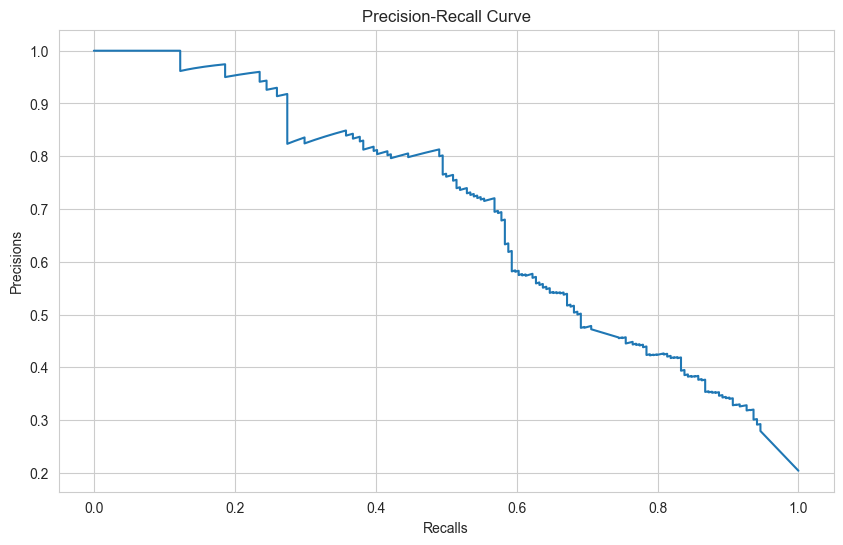

In [301]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "ANN")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [302]:
average_precision_score(y_test, y_pred_proba)

0.6867254092739655

# Final Model and Model Deployment

In [384]:
import pickle
pickle.dump(transformer, open("transformer_churn", "wb"))
pickle.dump(scaler, open("scaler_churn", "wb"))

In [385]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

In [310]:
tf.random.set_seed(seed)
tf.keras.backend.clear_session()

model = Sequential()

model.add(Dense(units = 20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

opt = Nadam(lr = 0.003)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 100, restore_best_weights = True)

model.fit(x = X_train, 
          y = y_train, 
          validation_data = (X_test, y_test), 
          callbacks = [early_stop], 
          batch_size = 256,
          epochs = 1000,
          verbose = 1,
          class_weight = class_weights)

Epoch 1/1000
36/36 [==============================] - 1s 4ms/step - loss: 0.6739 - recall: 0.5396 - val_loss: 0.6398 - val_recall: 0.5735
Epoch 2/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6294 - recall: 0.6667 - val_loss: 0.6006 - val_recall: 0.5588
Epoch 3/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.6039 - recall: 0.6792 - val_loss: 0.6406 - val_recall: 0.7108
Epoch 4/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5798 - recall: 0.7027 - val_loss: 0.5925 - val_recall: 0.7059
Epoch 5/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5556 - recall: 0.7207 - val_loss: 0.5325 - val_recall: 0.6716
Epoch 6/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5305 - recall: 0.7354 - val_loss: 0.5491 - val_recall: 0.7696
Epoch 7/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.5119 - recall: 0.7529 - val_loss: 0.4535 - val_recall: 0.6127
Epoch 8/1000
36/36 [==============

36/36 [==============================] - 0s 2ms/step - loss: 0.4555 - recall: 0.7589 - val_loss: 0.6444 - val_recall: 0.8725
Epoch 61/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4556 - recall: 0.7692 - val_loss: 0.4581 - val_recall: 0.7745
Epoch 62/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4537 - recall: 0.7578 - val_loss: 0.4798 - val_recall: 0.7843
Epoch 63/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4525 - recall: 0.7627 - val_loss: 0.4395 - val_recall: 0.7647
Epoch 64/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4524 - recall: 0.7600 - val_loss: 0.5098 - val_recall: 0.7990
Epoch 65/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4527 - recall: 0.7665 - val_loss: 0.5549 - val_recall: 0.8382
Epoch 66/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4531 - recall: 0.7730 - val_loss: 0.4485 - val_recall: 0.7696
Epoch 67/1000
36/36 [====================

Epoch 119/1000
36/36 [==============================] - 0s 1ms/step - loss: 0.4429 - recall: 0.7610 - val_loss: 0.4244 - val_recall: 0.7598
Epoch 120/1000
36/36 [==============================] - 0s 1ms/step - loss: 0.4417 - recall: 0.7610 - val_loss: 0.4614 - val_recall: 0.7892
Epoch 121/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4417 - recall: 0.7752 - val_loss: 0.4040 - val_recall: 0.7255
Epoch 122/1000
36/36 [==============================] - 0s 1ms/step - loss: 0.4427 - recall: 0.7632 - val_loss: 0.4568 - val_recall: 0.7990
Epoch 123/1000
36/36 [==============================] - 0s 1ms/step - loss: 0.4416 - recall: 0.7769 - val_loss: 0.3915 - val_recall: 0.7206
Epoch 124/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4417 - recall: 0.7621 - val_loss: 0.5541 - val_recall: 0.8480
Epoch 125/1000
36/36 [==============================] - 0s 2ms/step - loss: 0.4425 - recall: 0.7720 - val_loss: 0.4077 - val_recall: 0.7500
Epoch 126/1000
36/36

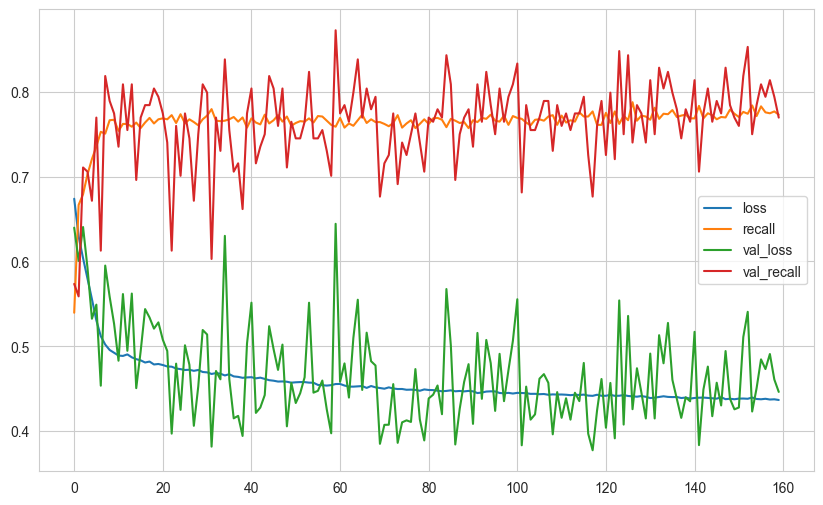

In [312]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [313]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 499us/step
[[478 318]
 [ 26 178]]
              precision    recall  f1-score   support

         0.0       0.95      0.60      0.74       796
         1.0       0.36      0.87      0.51       204

    accuracy                           0.66      1000
   macro avg       0.65      0.74      0.62      1000
weighted avg       0.83      0.66      0.69      1000



In [386]:
model.save("model.churn.h5")

## Prediction

In [416]:
single_customer = df.drop(columns = "Exited").iloc[0]
single_customer

onehotencoder__x0_France         1.000
onehotencoder__x0_Germany        0.000
onehotencoder__x0_Spain          0.000
onehotencoder__x1_Female         1.000
onehotencoder__x1_Male           0.000
CreditScore                    619.000
Age                             42.000
Tenure                           2.000
Balance                          0.000
NumOfProducts                    1.000
HasCrCard                        1.000
IsActiveMember                   1.000
EstimatedSalary             101348.880
Name: 0, dtype: float64

In [420]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 13))
single_customer

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489]])

In [421]:
model.predict(single_customer)
# 0.5  olasılığın üzerine 1 diyorduk burada olasılık 0.78.

1/1 [==============================] - 0s 41ms/step


array([[0.78073746]], dtype=float32)

In [423]:
df["Exited"].iloc[0]
# Burdan da sağlamasını ypatık.

1.0

## Comparison with ML

In [424]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [425]:
clf1 = RandomForestClassifier(random_state = seed, class_weight = "balanced")
clf2 = SVC(probability = True, random_state = seed, class_weight = "balanced")
clf3 = LogisticRegression(random_state = seed, class_weight = "balanced")

In [428]:
param1 = {}
param1["classifier__n_estimators"] = [10, 50, 100, 250]
param1["classifier__max_depth"] = [5, 10, 20]
param1["classifier"] = [clf1]

param2 = {}
param2["classifier__C"] = [0.01, 0.1, 1, 10, 100]
param2["classifier"] = [clf2]

param3 = {}
param3["classifier__C"] = [0.01, 0.1, 1, 10, 100]
param3["classifier__penalty"] = ["l1", "l2"]
param3["classifier"] = [clf3]

In [429]:
display(param1, param2, param3)

{'classifier__n_estimators': [10, 50, 100, 250],
 'classifier__max_depth': [5, 10, 20],
 'classifier': [RandomForestClassifier(class_weight='balanced', random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier': [SVC(class_weight='balanced', probability=True, random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__penalty': ['l1', 'l2'],
 'classifier': [LogisticRegression(class_weight='balanced', random_state=42)]}

In [430]:
pipeline = Pipeline([("classifier", clf1)])
params = [param1, param2, param3]

In [431]:
pipeline

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [433]:
grid_model = GridSearchCV(pipeline, params, cv = 5, n_jobs = -1, scoring = "recall")
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               max_depth=5,
                                                               n_estimators=50,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(class_weight='balanced',
                                                                max_depth=5,
                                                                n_estimators=50,
                                                                random_state=42)],
                          'classifier__max_depth': [5, 10, 20],
                          'classifier__n_estimators': [10, 50, 100, 250]},
                         {'classifier': [SVC(class_weight='balanced',
                                    

In [434]:
grid_model.best_params_
# En iyi classifier RandomForest imiş.

{'classifier': RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                        random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

In [435]:
grid_model.best_score_

0.7304953767811677

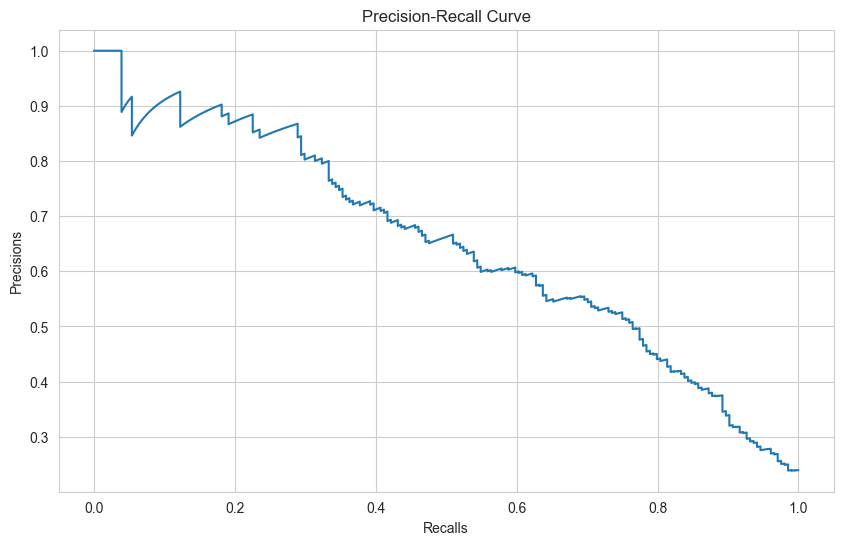

In [436]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label = "RF")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

In [437]:
average_precision_score(y_test, y_pred_proba)

0.6501412159828897

In [439]:
y_pred = grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[634 162]
 [ 46 158]]
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86       796
         1.0       0.49      0.77      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.79      0.73      1000
weighted avg       0.84      0.79      0.81      1000

